#**STOCK PRICE PREDICTION USING MACHINE LEARNING**

Developed by: Aakash R, Aarthy R, Naresh Chanthar G, Navina JS - III CSE A

# **DATA COLLECTION & PRE-PROCESSING**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

## USING Pandas_DataReader to dynamically scrape details from Yahoo Finance Website

In [2]:
import yfinance as df #impoting the daatset
df.pdr_override()
from pandas_datareader import data as pdr 
df = pdr.get_data_yahoo('PG', start='1995-1-1') #The Procter & Gamble Company with the start year 1995

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.722906,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.661001,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.552664,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.568140,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.537183,1795200


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-16,155.869995,156.919998,154.929993,155.740005,155.740005,5591500
2023-05-17,156.259995,156.559998,153.899994,155.080002,155.080002,4286900
2023-05-18,153.309998,153.649994,151.600006,152.529999,152.529999,6997600
2023-05-19,152.470001,153.320007,151.839996,153.169998,153.169998,4752700
2023-05-22,152.500000,152.559998,150.584000,150.595001,150.595001,741342


In [5]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.722906,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.661001,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.552664,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.568140,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.537183,1795200


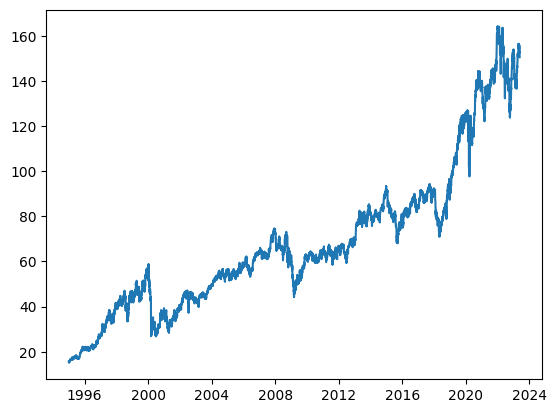

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.468750,15.625000,15.437500,15.593750,7.722906,3318400
1995-01-04,15.531250,15.656250,15.312500,15.468750,7.661001,2218800
1995-01-05,15.375000,15.437500,15.218750,15.250000,7.552664,2319600
1995-01-06,15.156250,15.406250,15.156250,15.281250,7.568140,3438000
1995-01-09,15.343750,15.406250,15.187500,15.218750,7.537183,1795200
...,...,...,...,...,...,...
2023-05-16,155.869995,156.919998,154.929993,155.740005,155.740005,5591500
2023-05-17,156.259995,156.559998,153.899994,155.080002,155.080002,4286900
2023-05-18,153.309998,153.649994,151.600006,152.529999,152.529999,6997600


In [8]:
# finding the mean of 100 values (100 days moving average)
ma100 = df.Close.rolling(100).mean()
ma100

Date
1995-01-03           NaN
1995-01-04           NaN
1995-01-05           NaN
1995-01-06           NaN
1995-01-09           NaN
                 ...    
2023-05-16    146.947201
2023-05-17    146.979601
2023-05-18    146.983001
2023-05-19    146.988501
2023-05-22    146.954951
Name: Close, Length: 7147, dtype: float64

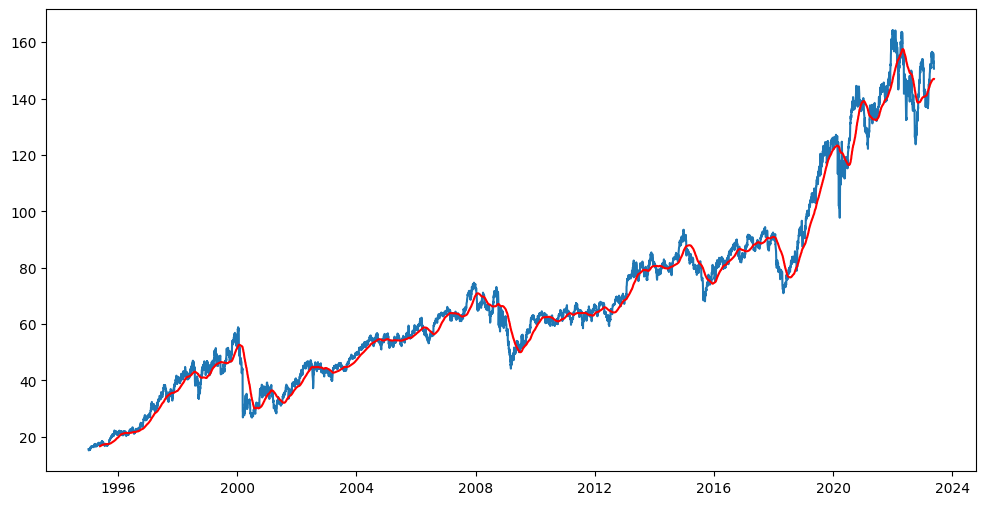

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
# finding 200 days moving average
ma200 = df.Close.rolling(200).mean()
ma200

Date
1995-01-03           NaN
1995-01-04           NaN
1995-01-05           NaN
1995-01-06           NaN
1995-01-09           NaN
                 ...    
2023-05-16    143.314500
2023-05-17    143.375400
2023-05-18    143.428300
2023-05-19    143.469750
2023-05-22    143.499475
Name: Close, Length: 7147, dtype: float64

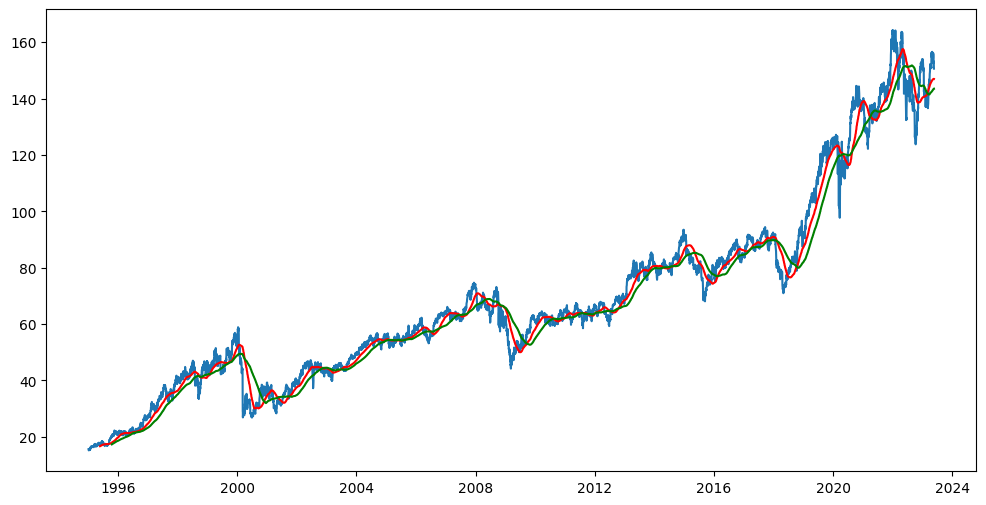

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

# TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(5002, 1)
(2145, 1)


In [13]:
data_training.head()

,Close
Date,
1995-01-03,15.59375
1995-01-04,15.46875
1995-01-05,15.25000
1995-01-06,15.28125
1995-01-09,15.21875


In [14]:
data_testing.head()

,Close
Date,
2014-11-12,89.480003
2014-11-13,88.599998
2014-11-14,88.110001
2014-11-17,87.839996
2014-11-18,87.949997


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[5.03685310e-03],
       [3.35790207e-03],
       [4.19737758e-04],
       ...,
       [9.92746919e-01],
       [9.97045030e-01],
       [1.00000000e+00]])

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train, y_train =np.array(x_train),np.array(y_train)

# MODEL SELECTION



In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50,activation ='relu' ,return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0,2))



model.add(LSTM(units = 60,activation ='relu' ,return_sequences = True,))
model.add(Dropout(0,3))




model.add(LSTM(units = 80,activation ='relu' ,return_sequences = True,))
model.add(Dropout(0,4))



model.add(LSTM(units =120,activation ='relu'))
model.add(Dropout(0,5))



model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
154/154 [==============================] - 53s 303ms/step - loss: 0.0186
Epoch 2/50
154/154 [==============================] - 45s 295ms/step - loss: 9.5001e-04
Epoch 3/50
154/154 [==============================] - 47s 303ms/step - loss: 9.9865e-04
Epoch 4/50
154/154 [==============================] - 45s 295ms/step - loss: 8.3054e-04
Epoch 5/50
154/154 [==============================] - 46s 298ms/step - loss: 7.5294e-04
Epoch 6/50
154/154 [==============================] - 46s 302ms/step - loss: 6.3282e-04
Epoch 7/50
154/154 [==============================] - 45s 295ms/step - loss: 5.7317e-04
Epoch 8/50
154/154 [==============================] - 46s 302ms/step - loss: 4.6102e-04
Epoch 9/50
154/154 [==============================] - 46s 297ms/step - loss: 4.1215e-04
Epoch 10/50
154/154 [==============================] - 46s 298ms/step - loss: 3.4465e-04
Epoch 11/50
154/154 [==============================] - 47s 304ms/step - loss: 3.4146e-04
Epoch 12/50
154/154 [=============

In [22]:
model.save('keras_model.h5')

In [23]:
data_testing.head()


,Close
Date,
2014-11-12,89.480003
2014-11-13,88.599998
2014-11-14,88.110001
2014-11-17,87.839996
2014-11-18,87.949997


In [24]:
data_training.tail(100)

,Close
Date,
2014-06-23,79.519997
2014-06-24,79.010002
2014-06-25,79.320000
2014-06-26,78.620003
2014-06-27,79.019997
...,...
2014-11-05,89.000000
2014-11-06,88.900002
2014-11-07,89.129997


In [25]:
past_100_days = data_testing.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-26-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [27]:
final_df.head()

,Close
0,151.960007
1,152.589996
2,151.559998
3,151.570007
4,152.229996


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.87259492],
       [0.87914707],
       [0.86843465],
       ...,
       [0.87852307],
       [0.88517933],
       [0.85839829]])

In [29]:
input_data.shape

(2245, 1)

In [30]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])



In [31]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2145, 100, 1)
(2145,)


In [32]:
# Making Predictions

y_predicted = model.predict(x_test)

68/68 [==============================] - 7s 99ms/step


In [33]:
y_predicted.shape

(2145, 1)

In [34]:
scaler.scale_

array([0.01040042])

In [35]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

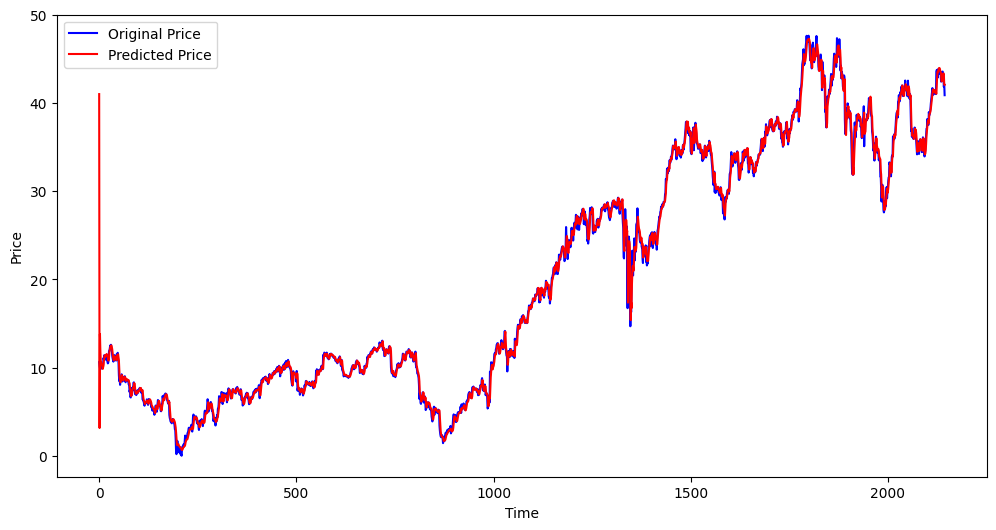

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()